# Análise de dados de nível estático observados no piezômetro 112/Riacho Guaraíra

### Obs: trabalho reaalizados apenas com dados de 2018, retirados de duas estações.

#### 1ª etapa:Junção dos dois arquivos disponibilizados em um único arquivo formato csv, através de uma ferrramenta de inteligência artificial.

##### _obs:achei melhor fazer assim, porque tive problemas com o "concat" em outros trabalhos nesse meu computador, ok?_

#### 2ª etapa: Carregar o arquivo dentro do jupyter notebook

In [2]:
import pandas as pd # carregando a biblioteca que vai ser utilizada para o trabalho

In [3]:

df = pd.read_csv(r"C:\Users\AUGUSTO\Desktop\Trabalho piezometros\juncao_estacoes.csv", header=None)

# Novamente, eu já carreguei direto aqui, sem concatenar, porque fiz a junção do arquivo com inteligência artificial.

In [4]:
df.head(15)

,0,1,2,3,4,5,6,7,8,9
0,112,2017,243,23,15,0.745,28/08/17 15:25:50,1.544 m,Nível estático,0.700 m
1,112,2017,243,23,30,0.745,NaN,NaN,NaN,NaN
2,112,2017,243,23,45,0.750,NaN,NaN,NaN,NaN
3,112,2017,244,0,0,0.745,NaN,NaN,NaN,NaN
4,112,2017,244,0,15,0.750,NaN,NaN,NaN,NaN
5,112,2017,244,0,30,0.745,NaN,NaN,NaN,NaN
6,112,2017,244,0,45,0.745,NaN,NaN,NaN,NaN
7,112,2017,244,1,0,0.745,NaN,NaN,NaN,NaN
8,112,2017,244,1,15,0.745,NaN,NaN,NaN,NaN
9,112,2017,244,1,30,0.745,NaN,NaN,NaN,NaN


In [5]:
# Excluir as colunas 6,7,8,9, desnecssárias para a nossa análise.

df_dropped = df.drop(columns=[6,7,8,9])

In [6]:
df_dropped.head()

,0,1,2,3,4,5
0,112,2017,243,23,15,0.745
1,112,2017,243,23,30,0.745
2,112,2017,243,23,45,0.750
3,112,2017,244,0,0,0.745
4,112,2017,244,0,15,0.750


In [7]:
# Renomeando as colunas, para organizar o nosso arquivo.

df_dropped.columns = ["cod_piezo","ano","dia_juliano", "hora", "minutos", "nivel_estatico"]

In [8]:
df_dropped.head(15)

,cod_piezo,ano,dia_juliano,hora,minutos,nivel_estatico
0,112,2017,243,23,15,0.745
1,112,2017,243,23,30,0.745
2,112,2017,243,23,45,0.750
3,112,2017,244,0,0,0.745
4,112,2017,244,0,15,0.750
5,112,2017,244,0,30,0.745
6,112,2017,244,0,45,0.745
7,112,2017,244,1,0,0.745
8,112,2017,244,1,15,0.745
9,112,2017,244,1,30,0.745


In [9]:
# Vamos saber mais detalhes do que estamos trabalhando:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64252 entries, 0 to 64251
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cod_piezo       64252 non-null  int64  
 1   ano             64252 non-null  int64  
 2   dia_juliano     64252 non-null  int64  
 3   hora            64252 non-null  int64  
 4   minutos         64252 non-null  int64  
 5   nivel_estatico  64252 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 2.9 MB


In [10]:
# Com as colunas renomeadas, e o entendimento do dataset que estamos trabalhando, vamos a visualização de dados duplicados.(soma)
df_dropped.duplicated().sum()


14002

In [11]:
# Foram encontrados 14002 dados duplicados. Vamos analisar agora para cada coluna separadamente.
for col in df_dropped.columns:
    num_duplicados = df_dropped[col].duplicated().sum()
    print(f"{col}: {num_duplicados} valores duplicados")

# df_dropped[col].duplicated() verifica se cada valor da coluna já apareceu antes.
#.sum() soma todos os True, ou seja, conta os duplicados (exceto a primeira ocorrência de cada valor).


cod_piezo: 64251 valores duplicados
ano: 64249 valores duplicados
dia_juliano: 63887 valores duplicados
hora: 64228 valores duplicados
minutos: 64247 valores duplicados
nivel_estatico: 63711 valores duplicados


In [12]:
# Vamos agora remover os valores duplicados.
df_dropped = df_dropped.drop_duplicates()


In [13]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50250 entries, 0 to 64251
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cod_piezo       50250 non-null  int64  
 1   ano             50250 non-null  int64  
 2   dia_juliano     50250 non-null  int64  
 3   hora            50250 non-null  int64  
 4   minutos         50250 non-null  int64  
 5   nivel_estatico  50250 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 2.7 MB


In [14]:
# Nestes novos valores, vou colocar o sinal negativo em todos os dados da coluna nivel_estatico
df_dropped['nivel_estatico'] = -df_dropped['nivel_estatico'].abs()

#  .abs() garante que todos os valores estejam positivos antes de aplicar o sinal negativo (evita que um valor já negativo vire positivo).

In [15]:
df_dropped.head(15)

,cod_piezo,ano,dia_juliano,hora,minutos,nivel_estatico
0,112,2017,243,23,15,-0.745
1,112,2017,243,23,30,-0.745
2,112,2017,243,23,45,-0.750
3,112,2017,244,0,0,-0.745
4,112,2017,244,0,15,-0.750
5,112,2017,244,0,30,-0.745
6,112,2017,244,0,45,-0.745
7,112,2017,244,1,0,-0.745
8,112,2017,244,1,15,-0.745
9,112,2017,244,1,30,-0.745


In [16]:
# Sucesso. Seguindo, vamos excluir os dados dos anos de 2017 e 2019 do dataframe. Existem diversas formas, mas vou usar a que mantém apenas o ano de 2018.
df_dropped = df_dropped[df_dropped['ano'] == 2018]

df_ano_2018 = df_dropped # apenas chamei meu df_dropped de algo mais escaneável, df_ano_2018, até para saber que os dados são apenas de 2018.



In [17]:
df_ano_2018.head(15)

,cod_piezo,ano,dia_juliano,hora,minutos,nivel_estatico
11715,112,2018,1,0,0,-1.505
11716,112,2018,1,0,15,-1.505
11717,112,2018,1,0,30,-1.505
11718,112,2018,1,0,45,-1.505
11719,112,2018,1,1,0,-1.505
11720,112,2018,1,1,15,-1.505
11721,112,2018,1,1,30,-1.505
11722,112,2018,1,1,45,-1.505
11723,112,2018,1,2,0,-1.505
11724,112,2018,1,2,15,-1.505


In [18]:
df_ano_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35039 entries, 11715 to 60755
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cod_piezo       35039 non-null  int64  
 1   ano             35039 non-null  int64  
 2   dia_juliano     35039 non-null  int64  
 3   hora            35039 non-null  int64  
 4   minutos         35039 non-null  int64  
 5   nivel_estatico  35039 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 1.9 MB


# Tranformação de dados relativos a data e hora de observação

<div style="background-color: #f0f8ff; border-left: 6px solid #4682b4; padding: 16px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size: 16px; line-height: 1.6; border-radius: 8px; box-shadow: 2px 2px 6px rgba(0,0,0,0.1);">

<strong>Curiosidade interessante sobre os calendários:</strong><br><br>
O calendário juliano foi criado por Júlio César em 46 a.C., baseado em um ano solar de 365,25 dias. Com o tempo, acumulou um erro de cerca de 11 minutos por ano em relação ao ano solar real. Para corrigir esse desvio, o calendário gregoriano foi instituído pelo Papa Gregório XIII em 1582.

</div>

#### 1º Passo: Converter do calendário juliano (dia do ano) para data gregoriana

In [19]:
df_ano_2018['data'] = pd.to_datetime(df_ano_2018['ano'] * 1000 + df_ano_2018['dia_juliano'], format='%Y%j')

# Converte o ano e o dia juliano em uma data real no formato YYYY-MM-DD
# 1. Multiplica o ano por 1000 e soma o dia juliano para formar algo como 2018001, 2018032, etc.
# 2. Usa pd.to_datetime com o formato '%Y%j', onde:
#    - %Y é o ano (ex: 2018)
#    - %j é o dia juliano (de 001 a 365 ou 366)
# 3. Cria uma nova coluna 'data' com a data correspondente ao ano e dia juliano
# df_ano_2018['data'] = pd.to_datetime(df_ano_2018['ano'] * 1000 + df_ano_2018['dia_juliano'], format='%Y%j')


#### 2º Passo: formatar hora e minutos com dois dígitos

In [20]:
df_ano_2018['hora_str'] = df_ano_2018['hora'].astype(str).str.zfill(2)       # ex: 5 fica '05'
df_ano_2018['minutos_str'] = df_ano_2018['minutos'].astype(str).str.zfill(2) # ex: 7 fica '07'

#### 3º Passo: concatenar para criar string de hora no formato HH:MI:SS 

In [21]:
df_ano_2018['hora_formatada'] = df_ano_2018['hora_str'] + ':' + df_ano_2018['minutos_str'] + ':00'

# Cria a coluna 'hora_formatada' no formato 'HH:MM:SS'
# Junta as colunas de hora e minuto (como strings) e adiciona ':00' como segundos
# Exemplo: '08' + ':' + '30' + ':00' = '08:30:00'



#### 4º Passo: concatenar data com hora e transformar em datetime completo 

In [22]:
df_ano_2018['datahora_str'] = df_ano_2018['data'].dt.strftime('%Y-%m-%d') + ' ' + df_ano_2018['hora_formatada']
df_ano_2018['datahora'] = pd.to_datetime(df_ano_2018['datahora_str'], format='%Y-%m-%d %H:%M:%S')

#### 5º Passo: manter apenas as colunas desejadas e definir datahora como índice

In [23]:
df_ano_2018 = df_ano_2018[['cod_piezo', 'nivel_estatico', 'datahora']].set_index('datahora')

In [24]:
df_ano_2018.head(15) #Verificar como estão os dados

,cod_piezo,nivel_estatico
datahora,,
2018-01-01 00:00:00,112,-1.505
2018-01-01 00:15:00,112,-1.505
2018-01-01 00:30:00,112,-1.505
2018-01-01 00:45:00,112,-1.505
2018-01-01 01:00:00,112,-1.505
2018-01-01 01:15:00,112,-1.505
2018-01-01 01:30:00,112,-1.505
2018-01-01 01:45:00,112,-1.505
2018-01-01 02:00:00,112,-1.505


# Visualização e análise de dados final

#### 1.Estatísticas descritivas para dados de **15 em 15 minutos**

In [33]:
df_ano_2018.describe()


,cod_piezo,nivel_estatico
count,35039.0,35039.000000
mean,112.0,-1.161831
std,0.0,0.374451
min,112.0,-1.905000
25%,112.0,-1.460000
50%,112.0,-1.112000
75%,112.0,-0.855000
max,112.0,-0.438000


#### 2.Criar gráficos de linha, boxplot e histograma (apenas com a biblioteca pandas)

<Axes: title={'center': 'Nível Estático - Linha'}, xlabel='datahora'>

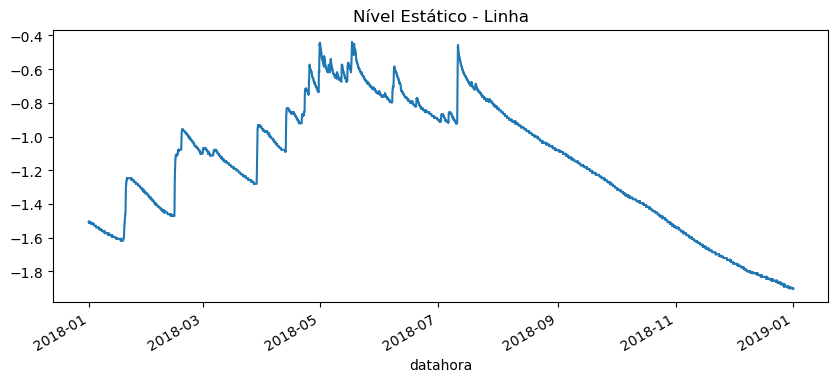

In [34]:
#Gráfico de linha
df_ano_2018['nivel_estatico'].plot(title='Nível Estático - Linha', figsize=(10, 4))


<Axes: >

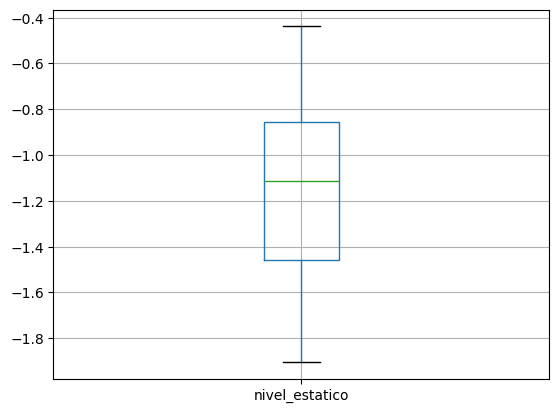

In [35]:
#Gráfico Boxplot
df_ano_2018.boxplot(column='nivel_estatico')


<Axes: title={'center': 'Histograma do Nível Estático'}, ylabel='Frequency'>

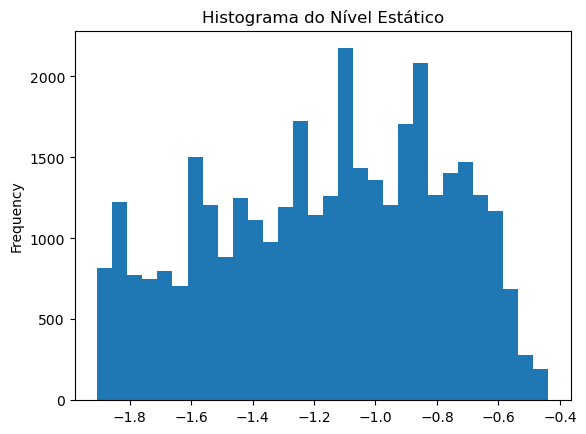

In [36]:
# Grágico de histograma
df_ano_2018['nivel_estatico'].plot(kind='hist', bins=30, title='Histograma do Nível Estático')


#### 1.Estatísticas descritivas para dados para dos **dados médios diários**

In [45]:
df_diario = df_ano_2018.resample('D').mean() # Dados médios diários

In [46]:
df_diario.head(10)

,cod_piezo,nivel_estatico
datahora,,
2018-01-01,112.0,-1.508312
2018-01-02,112.0,-1.514281
2018-01-03,112.0,-1.519938
2018-01-04,112.0,-1.530208
2018-01-05,112.0,-1.539000
2018-01-06,112.0,-1.545844
2018-01-07,112.0,-1.552729
2018-01-08,112.0,-1.561000
2018-01-09,112.0,-1.569500


#### 2.Criar gráficos de linha, boxplot e histograma (apenas com a biblioteca pandas)

<Axes: title={'center': 'Nível Estático - Média Diária'}, xlabel='datahora'>

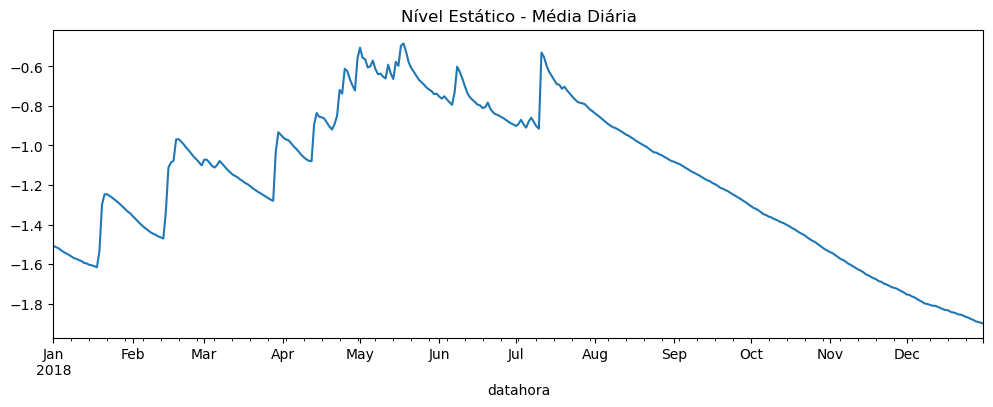

In [49]:
#Gráfico de linha

df_diario['nivel_estatico'].plot(title='Nível Estático - Média Diária', figsize=(12, 4))


<Axes: >

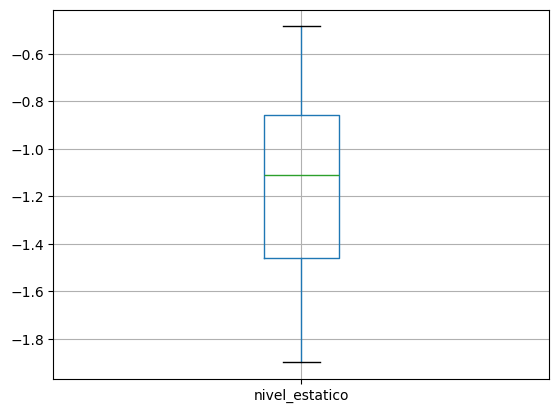

In [48]:
# Gráfico Boxplot

df_diario.boxplot(column='nivel_estatico')


<Axes: >

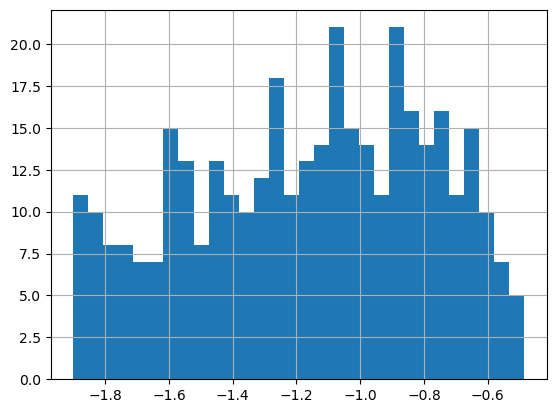

In [50]:
# Histograma

df_diario['nivel_estatico'].hist(bins=30)


#### 1.Estatísticas descritivas para dados para dos **dados médios mensais**

In [54]:
df_mensal = df_ano_2018.resample('ME').mean()

In [55]:
df_mensal.head(15)

,cod_piezo,nivel_estatico
datahora,,
2018-01-31,112.0,-1.458494
2018-02-28,112.0,-1.229159
2018-03-31,112.0,-1.149865
2018-04-30,112.0,-0.879653
2018-05-31,112.0,-0.623410
2018-06-30,112.0,-0.785455
2018-07-31,112.0,-0.771395
2018-08-31,112.0,-0.966187
2018-09-30,112.0,-1.187150


#### 2.Criar gráficos de linha, boxplot e histograma (apenas com a biblioteca pandas)

<Axes: title={'center': 'Nível Estático - Média Mensal'}, xlabel='datahora'>

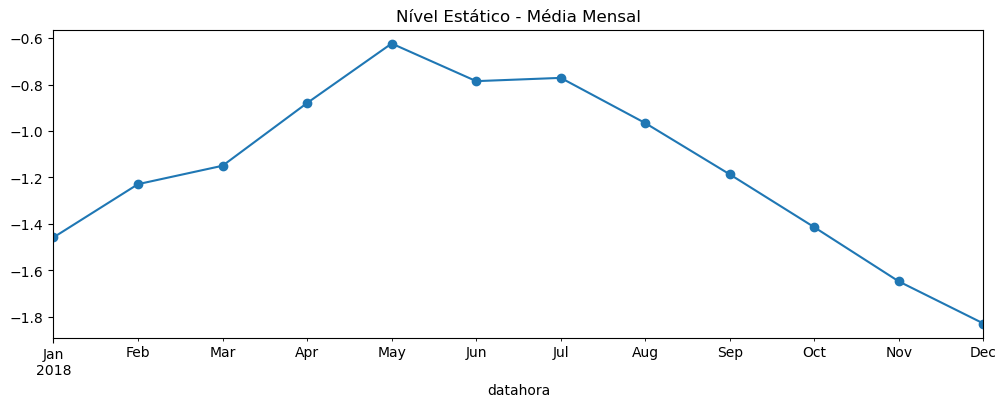

In [56]:
# Gráfico de linha

df_mensal['nivel_estatico'].plot(title='Nível Estático - Média Mensal', figsize=(12, 4), marker='o')


<Axes: >

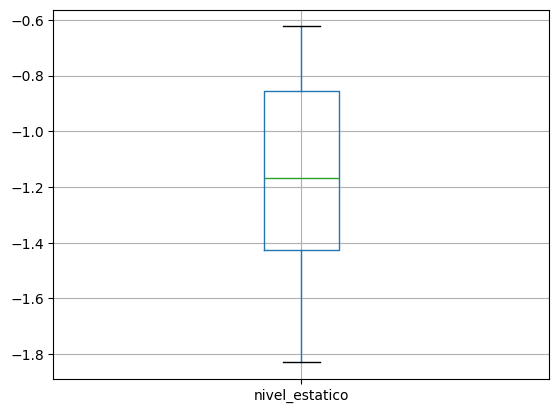

In [58]:
# Gráfico Boxplot

df_mensal.boxplot(column='nivel_estatico')

<Axes: >

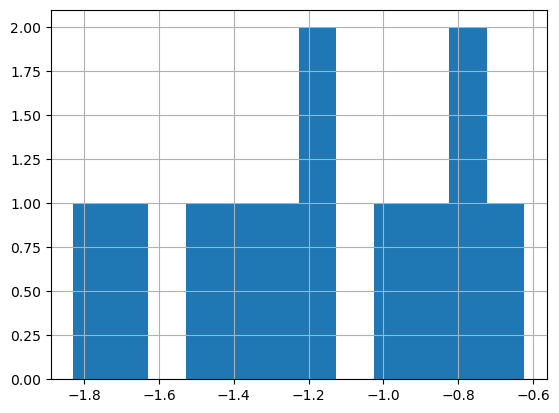

In [59]:
# Histograma

df_mensal['nivel_estatico'].hist(bins=12)

<div style="border: 2px solid #4CAF50; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; background-color: #f9fff9; color: #333;">
  <h2 style="color: #2e7d32;">📌 Análise Final</h2>
  <p><strong>Período analisado:</strong> 2018 (dados com passo de 15 em 15 minutos).</p>
  <p><strong>Parâmetros avaliados:</strong> nível estático médio, distribuição, variações diárias e mensais.</p>
  <ul>
    <li>✔️ Os dados foram limpos, filtrando apenas o ano de 2018.</li>
    <li>✔️ Datas e horários foram unificados e convertidos corretamente.</li>
    <li>✔️ Foram plotados gráficos de linha, boxplot e histograma utilizando apenas <code>pandas</code>.</li>
    <li>✔️ Análises descritivas foram feitas para as séries de 15min, médias diárias e mensais.</li>
  </ul>
  <p><strong>Observações:</strong> A série temporal apresenta variações sazonais e pode ser útil para monitoramento e estudos de tendência. A etapa de resample foi fundamental para avaliar o comportamento em diferentes escalas temporais.</p>
</div>
